# ***Twitter Data Social Sentiment Analysis on Ukraine War***

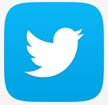
---



**1.Creating our own packages, mounting google colab on Google Drive and downloading our packages from Google Drive**

In [ ]:
import os
#Connecting Google Drive Data Files to Google Colab Notebook
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive/My package')

**2.We have created our own function and saved on google drive, Importing the functions as func here**

In [ ]:
import functions as func

**3.Installation and import of required Packages and libraries for the Project**

In [ ]:
# Install Libraries
!pip install textblob
!pip install tweepy
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**4.Extracting Twitter data with Twitter API**


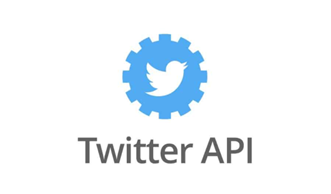

For Extraction from Twitter API we require Access Key and Consumer Key.

Tweepy supports Authentication by OAuthHandler class.


**5.Authentication for Twitter API**

In [ ]:
#Required Credentials to download data via API
consumer_key="xebmrrBFoA1PUEMqMZyPAs7WZ"
consumer_secret="UAji77LrCfleFXtBaVwQxsuGTVJJUeK2wnB0kgiF0DZSIOWQcv"
access_token="933264924872130560-ZFENO7Styjd4FTb6jEIbgnO8QiASGqT"
access_token_secret="xI1VtW0Oh3FisRmag2qO45XSEAQGAE3c7oUcOnqAIYCKl"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api= tweepy.API(auth)

 **We have used VADER Sentiment Intensity Analyzer from Natural Language Toolkit (NLTK) Library to check the polarity**

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

**6.Getting Tweets With Keyword or Hashtag in our case we used (#Ukrainewar)**

**After authentication, we used tweepy to get tweets and use Textblob to calculate positive, negative, neutral, polarity and compound parameters from the tweets.**

**We have Analyzed in total 2000 tweets on #Ukainewar**

In [ ]:
#Sentiment Analysis
keyword = input('Please enter keyword or hashtag to search:')
noOfTweet = int(input ('Please enter how many tweets to analyze:'))
tweets = tweepy.Cursor(api.search,q=keyword+" -filter:retweets",lang='en',result_type='recent').items(noOfTweet)

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity

 if neg > pos:
   negative_list.append(tweet.text)
   negative += 1
 elif pos > neg:
   positive_list.append(tweet.text)
   positive += 1
 elif pos == neg:
   neutral_list.append(tweet.text)
   neutral += 1
positive = func.percentage(positive, noOfTweet)
negative = func.percentage(negative, noOfTweet)
neutral =  func.percentage(neutral, noOfTweet)
polarity = func.percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search:#Ukrainwar
Please enter how many tweets to analyze:100


**After getting 2000 tweets about “Ukraine war”, we created Data Frames for Total tweets, Neutral tweets, Positive tweets and Negative tweets**

In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number:',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number: 100
positive number:  42
negative number:  36
neutral number:  22


**Exploratory Data Analysis (EDA):**

**For EDA we have used VADER Sentiment Intensity Analyzer from Natural Language Toolkit (NLTK) Library**

**For Visualization of Sentiments we are using Pie Chart**

**which shows**

**546 (27.3%) of tweets include Positive sentiment**

**933 (46.6%) of tweets include Negative sentiment**

**521 (26.1%) of tweets include Neutral sentiment**



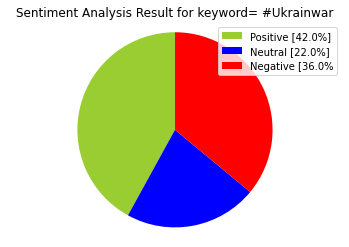

In [ ]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword= '+keyword+"")
plt.axis('equal')
plt.show()

**Checking our Data Frame**

In [ ]:
tweet_list

,0
0,@shaunwalker7 #Ukraine #UkraineRussiaWar #Ukra...
1,#Ukraine #UkraineRussiaWar #UkraineRussiaWar #...
2,#Ukraine #UkraineRussiaWar #UkraineRussiaWar #...
3,🚨🚨🚨 Important - Please Watch this video till t...
4,"@s_m_marandi Finally, The Economist found a wa..."
...,...
95,"Russian players, including the number one play..."
96,@TheEconomist Turning guns in Lithuania is far...
97,"109 empty strollers sit in a Lviv square, repr..."
98,GENOCIDIO NEL DONBASS ? Sembra proprio di no #...


In [ ]:
export_csv = tweet_list.to_csv (r'./tweets.csv', header=True)

**Cleaning Tweets to Analyse Sentiment**

**Here we are creating new data frame (tweets_clean) and a new feature(tweets), then clean tweets by using lambda function and clean RT in front of tweets, URL links, punctuation characters and convert to lowercase.**

In [ ]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tweets_clean = pd.DataFrame(tweet_list)
tweets_clean['tweets'] = tweets_clean[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ','',x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tweets_clean['tweets'] = tweets_clean.tweets.map(remove_rt).map(rt)
tweets_clean['tweets'] = tweets_clean.tweets.str.lower()
tweets_clean.head(10)

,0,tweets
0,@shaunwalker7 #Ukraine #UkraineRussiaWar #Ukra...,ukraine ukrainerussiawar ukrainerussiawar...
1,#Ukraine #UkraineRussiaWar #UkraineRussiaWar #...,ukraine ukrainerussiawar ukrainerussiawar ...
2,#Ukraine #UkraineRussiaWar #UkraineRussiaWar #...,ukraine ukrainerussiawar ukrainerussiawar ...
3,🚨🚨🚨 Important - Please Watch this video till t...,important please watch this video till t...
4,"@s_m_marandi Finally, The Economist found a wa...",m marandi finally the economist found a war...
5,".@POTUS @JoeBiden, @BorisJohnson, @NATO, help ...",help ukraine recover crimea and ...
6,Issue in Public Interest by -\n\nhttps://t.co/...,issue in public interest by russia uk...
7,Pastor Julian's Wednesday morning video messag...,pastor julian s wednesday morning video messag...
8,Joseph Trevithick The war zone #ukrainwar http...,joseph trevithick the war zone ukrainwar
9,Safety PAL stands with Ukraine.\nWar is not a ...,safety pal stands with ukraine war is not a s...


**Sentiment Analyse**

**We used cleaned tweets to calculate polarity, subjectivity, sentiment, negative, positive, neutral and compound parameters again.**

**For all calculated parameters, We created new features to the data frame**

In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
tweets_clean[['polarity', 'subjectivity']] = tweets_clean['tweets'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweets_clean['tweets'].iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tweets_clean.loc[index, 'sentiment'] = 'negative'
  elif pos > neg:
    tweets_clean.loc[index, 'sentiment'] = 'positive'
  else:
    tweets_clean.loc[index, 'sentiment'] = 'neutral'
    tweets_clean.loc[index, 'neg'] = neg
    tweets_clean.loc[index, 'neu'] = neu
    tweets_clean.loc[index, 'pos'] = pos
    tweets_clean.loc[index, 'compound'] = comp

tweets_clean.head(10)

,0,tweets,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@shaunwalker7 #Ukraine #UkraineRussiaWar #Ukra...,ukraine ukrainerussiawar ukrainerussiawar...,0.5,0.500000,positive,NaN,NaN,NaN,NaN
1,#Ukraine #UkraineRussiaWar #UkraineRussiaWar #...,ukraine ukrainerussiawar ukrainerussiawar ...,0.0,0.100000,neutral,0.0,1.0,0.0,0.0
2,#Ukraine #UkraineRussiaWar #UkraineRussiaWar #...,ukraine ukrainerussiawar ukrainerussiawar ...,0.3,1.000000,positive,NaN,NaN,NaN,NaN
3,🚨🚨🚨 Important - Please Watch this video till t...,important please watch this video till t...,0.4,1.000000,positive,NaN,NaN,NaN,NaN
4,"@s_m_marandi Finally, The Economist found a wa...",m marandi finally the economist found a war...,0.0,1.000000,negative,NaN,NaN,NaN,NaN
5,".@POTUS @JoeBiden, @BorisJohnson, @NATO, help ...",help ukraine recover crimea and ...,0.0,0.000000,positive,NaN,NaN,NaN,NaN
6,Issue in Public Interest by -\n\nhttps://t.co/...,issue in public interest by russia uk...,0.0,0.066667,positive,NaN,NaN,NaN,NaN
7,Pastor Julian's Wednesday morning video messag...,pastor julian s wednesday morning video messag...,0.0,0.000000,neutral,0.0,1.0,0.0,0.0
8,Joseph Trevithick The war zone #ukrainwar http...,joseph trevithick the war zone ukrainwar,0.0,0.000000,negative,NaN,NaN,NaN,NaN
9,Safety PAL stands with Ukraine.\nWar is not a ...,safety pal stands with ukraine war is not a s...,0.0,0.000000,negative,NaN,NaN,NaN,NaN


In [ ]:
export_csv = tweets_clean.to_csv (r'./tweets_clean.csv', header=True)

**We have split data frame into 3 groups based on sentiment.**

**negative_tweets,positive_tweets,neutral_tweets and import from original tweets_clean data frame**

In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
negative_tweets = tweets_clean[tweets_clean['sentiment']=='negative']
positive_tweets = tweets_clean[tweets_clean['sentiment']=='positive']
neutral_tweets = tweets_clean[tweets_clean['sentiment']=='neutral']

**Count values for sentiment features for total percentage.**


In [ ]:
def count_values_in_column(data,feature):
  total=data.loc[:,feature].value_counts(dropna=False)
  percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
  return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
#Count_values for sentiment
count_values_in_column(tweets_clean,'sentiment')

,Total,Percentage
positive,44,44.0
negative,36,36.0
neutral,20,20.0


**Creating Pie chart by using number of sentiment tweets**

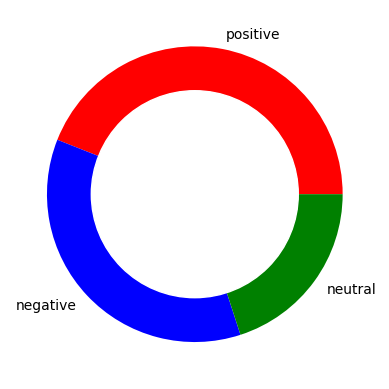

In [ ]:
# create data for Pie Chart
pc = count_values_in_column(tweets_clean,'sentiment')
pichart = count_values_in_column(tweets_clean,'sentiment')
names= pc.index
size=pc['Percentage']

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['red','blue','green'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

**We have created wordcloud using 2000 tweets. The Background to the word cloud is Map of Ukraine.**

**Here we can have a look that which words most used in these tweets.**

In [ ]:
#Function to Create Wordcloud
def create_wordcloud(text):
 mask = np.array(Image.open('/content/ukraine-flag-png-19360.png'))
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color='black',
 mask = mask,
 max_words=1000,
 stopwords=stopwords,
 repeat=True)
 wc.generate(str(text))
 wc.to_file('wc.png')
 print('Word Cloud Saved Successfully')
 path='wc.png'
 display(Image.open(path))

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(tweets_clean['tweets'].values)

**Word Cloud for tweets that have positive sentiments**

In [ ]:
#Creating wordcloud for negative sentiment
create_wordcloud(positive_tweets['tweets'].values)

**Word Cloud for tweets that have Negative sentiments**

In [ ]:
#Creating wordcloud for negative sentiment
create_wordcloud(negative_tweets['tweets'].values)

**We have calculated the tweet length and word count**

**Here you can see the density of words and characters used in tweets based on different sentiment.**

In [ ]:
#Calculating tweets lenght and word count
tweets_clean['text_len'] = tweets_clean['tweets'].astype(str).apply(len)
tweets_clean['text_word_count'] = tweets_clean['tweets'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tweets_clean.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,103.19
neutral,107.50
positive,104.50


In [ ]:
round(pd.DataFrame(tweets_clean.groupby('sentiment').text_word_count.mean()),2)

,text_word_count
sentiment,
negative,15.5
neutral,14.5
positive,14.8


**Here we are going to applying count vectorizer which provides the capability to preprocess text data prior to generating the vector representation making it a highly flexible feature representation module for text.**

**After count vectorizer, it is possible to analyze the words with two or three or whatever you want**

In [ ]:
#Removing Punctuation
def remove_punct(text):
  text = "".join([char for char in text if char not in string.punctuation])
  text = re.sub('[0–9]+', "", text)
  return text

tweets_clean['punct'] = tweets_clean['tweets'].apply(lambda x: remove_punct(x))

#Appliyng tokenization
def tokenization(text):
  text = re.split('\W+', text)
  return text

tweets_clean['tokenized'] = tweets_clean['punct'].apply(lambda x: tokenization(x.lower()))

#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
  text = [word for word in text if word not in stopword]
  return text

tweets_clean['nonstop'] = tweets_clean['tokenized'].apply(lambda x: remove_stopwords(x))

#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
  text = [ps.stem(word) for word in text]
  return text

tweets_clean['stemmed'] = tweets_clean['nonstop'].apply(lambda x: stemming(x))

#Cleaning Text
def clean_text(text):
  text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
  text_rc = re.sub('[0-9]+', '', text_lc)
  tokens = re.split('\W+', text_rc)    # tokenization
  text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
  return text

tweets_clean.head()

,0,tweets,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,@shaunwalker7 #Ukraine #UkraineRussiaWar #Ukra...,ukraine ukrainerussiawar ukrainerussiawar...,0.5,0.5,positive,NaN,NaN,NaN,NaN,107,15,ukraine ukrainerussiawar ukrainerussiawar...,"[, ukraine, ukrainerussiawar, ukrainerussiawar...","[, ukraine, ukrainerussiawar, ukrainerussiawar...","[, ukrain, ukrainerussiawar, ukrainerussiawar,..."
1,#Ukraine #UkraineRussiaWar #UkraineRussiaWar #...,ukraine ukrainerussiawar ukrainerussiawar ...,0.0,0.1,neutral,0.0,1.0,0.0,0.0,118,16,ukraine ukrainerussiawar ukrainerussiawar ...,"[, ukraine, ukrainerussiawar, ukrainerussiawar...","[, ukraine, ukrainerussiawar, ukrainerussiawar...","[, ukrain, ukrainerussiawar, ukrainerussiawar,..."
2,#Ukraine #UkraineRussiaWar #UkraineRussiaWar #...,ukraine ukrainerussiawar ukrainerussiawar ...,0.3,1.0,positive,NaN,NaN,NaN,NaN,75,6,ukraine ukrainerussiawar ukrainerussiawar ...,"[, ukraine, ukrainerussiawar, ukrainerussiawar...","[, ukraine, ukrainerussiawar, ukrainerussiawar...","[, ukrain, ukrainerussiawar, ukrainerussiawar,..."
3,🚨🚨🚨 Important - Please Watch this video till t...,important please watch this video till t...,0.4,1.0,positive,NaN,NaN,NaN,NaN,118,20,important please watch this video till t...,"[, important, please, watch, this, video, till...","[, important, please, watch, video, till, end,...","[, import, pleas, watch, video, till, end, mus..."
4,"@s_m_marandi Finally, The Economist found a wa...",m marandi finally the economist found a war...,0.0,1.0,negative,NaN,NaN,NaN,NaN,83,14,m marandi finally the economist found a war...,"[, m, marandi, finally, the, economist, found,...","[, marandi, finally, economist, found, war, li...","[, marandi, final, economist, found, war, like..."


**Our data frame has new features such as punct, tokenized, nonstop, stemmed.**

**After applying countverctorizer, two results showed us that 2000 tweets have 4049 unique words**

**We applied countvectorizer to see all 4049 unique words as a new features.**



In [ ]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text)
countVector = countVectorizer.fit_transform(tweets_clean['tweets'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

#2000 Number of reviews has 4049 words
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names_out())
count_vect_df.head()

100 Number of reviews has 473 words


,,abl,accept,access,account,across,ador,advanc,africa,african,...,withdraw,without,work,world,wreak,written,x,xbet,year,zone
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Sorting values as descending to see most used words**

In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(50)
countdf[1:11]

,0
ukrain,37
ukrainwar,30
code,21
war,21
xbet,20
betwinn,20
bet,20
opportun,20
star,20
promo,20


In [ ]:
export_csv = tweets_clean.to_csv (r'./sentiments.csv', header=True)